In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cv2
import imutils
import time
import uuid
import random
from scipy import ndimage
from skimage import exposure
from skimage.util import random_noise
from PIL import Image
from math import floor, ceil, pi
from glob import glob
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image

In [2]:
def get_image_paths(folder):
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

In [3]:
DATADIR = "/home/apofeo/Documents/car_logos"

In [4]:
directories = [x[0] for x in os.walk(DATADIR)]

In [5]:
imgs_logos_folders = get_image_paths(DATADIR)

In [6]:
print(len(imgs_logos_folders))

40


In [5]:
# for directory in directories:
#     if not os.path.exists(f'/home/apofeo/Documents/symbols_test/{directory.split("/")[-1]}'):
#             os.makedirs(f'/home/apofeo/Documents/symbols_test/{directory.split("/")[-1]}')

In [7]:
# print(directories[1:])
# print(len(directories[1:]))
# print(directories.split("/"))
CATEGORIES = []
for folder in directories[1:]:
    CATEGORIES.append(folder.split("/")[-1])
print(sorted(CATEGORIES))
print(len(CATEGORIES))
CATEGORIES = sorted(CATEGORIES)

['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
40


In [8]:
IMG_SIZE = 50

In [12]:
path = "/home/apofeo/Documents/symbols_new/0/0.png"
s_img = cv2.imread(path)
blured_image = ndimage.uniform_filter(s_img, size=(15, 15, 1))
# s_img = exposure.adjust_gamma(s_img, gamma=0.2, gain=0.9)
image_with_random_noise = random_noise(blured_image, mode='speckle',mean=-0.95)
# s_img = cv2.cvtColor(s_img, cv2.COLOR_RGB2RGBA)
# s_img = cv2.resize(s_img, (IMG_SIZE, IMG_SIZE))
# s_img = ndimage.rotate(s_img, 135, reshape=True)
# l_img = cv2.imread(imgs_background[29189])
# l_img = cv2.resize(l_img, (IMG_SIZE, IMG_SIZE))
# y_offset, x_offset = 0, 0
# x_offset=s_img.shape[0]//6
# y_offset=s_img.shape[1]//6
# s_img = cv2.imread("smaller_image.png", -1)

# cv2.imshow('l_img', l_img)
# cv2.waitKey(0)
# # [display]
# cv2.destroyAllWindows()

# y1, y2 = y_offset, y_offset + s_img.shape[0]
# x1, x2 = x_offset, x_offset + s_img.shape[1]

# alpha_s = s_img[:, :, 3] / 255.0
# alpha_l = 1.0 - alpha_s

# for c in range(0, 3):
#     l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
#                               alpha_l * l_img[y1:y2, x1:x2, c])

# crop_l_img = l_img[y1:y2, x1:x2]
cv2.imshow('image_with_random_noise', image_with_random_noise)
cv2.waitKey(0)
# [display]
cv2.destroyAllWindows()

In [9]:
import numpy as np
import cv2
def add_gaussian_noise(img, mean, var):
    img = img
    mean = mean
    var = var
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

# cv2.imshow('l_img', add_gaussian_noise(l_img,50,500))
# cv2.waitKey(0)
# # [display]
# cv2.destroyAllWindows()

#### Don't delete under this cell

#### Add noise

In [13]:
start = time.time()

for imgs_logos_folder in imgs_logos_folders:
    imgs_logos_folder_name = imgs_logos_folder.split("/")
    for imgs_logo in get_image_paths(imgs_logos_folder):
        for idx in range(0, 5):
            symbol_to_noise = cv2.imread(imgs_logo)
            symbol_to_rotate = cv2.imread(imgs_logo).copy()
            symbol_to_gamma = cv2.imread(imgs_logo).copy()
            filename_to_noise = uuid.uuid4().hex
            filename_to_rotate = uuid.uuid4().hex
            filename_to_gamma = uuid.uuid4().hex

            symbol_to_noise = add_gaussian_noise(symbol_to_noise,
                                                 random.randrange(10,30,5),
                                                 random.randrange(50,100,5))
            symbol_to_rotate = ndimage.rotate(symbol_to_rotate,
                                              random.randrange(-180,180,5),
                                              reshape=False)
            symbol_to_rotate = add_gaussian_noise(symbol_to_rotate,
                                                  random.randrange(10,30,5),
                                                  random.randrange(50,100,5))
            symbol_to_gamma = add_gaussian_noise(symbol_to_gamma,
                                                 random.randrange(10,30,5),
                                                 random.randrange(50,100,5))
            symbol_to_gamma = exposure.adjust_gamma(symbol_to_gamma,
                                                    gamma=round(random.uniform(0.1, 1.1), 2),
                                                    gain=round(random.uniform(0.1, 1.1), 2))
            
            if not os.path.exists(f'/home/apofeo/Documents/logos_noise_new/{imgs_logos_folder_name[-1]}'):
                os.makedirs(f'/home/apofeo/Documents/logos_noise_new/{imgs_logos_folder_name[-1]}')
            cv2.imwrite(f'/home/apofeo/Documents/logos_noise_new/{imgs_logos_folder_name[-1]}/{filename_to_noise}.png',
                        symbol_to_noise)
            cv2.imwrite(f'/home/apofeo/Documents/logos_noise_new/{imgs_logos_folder_name[-1]}/{filename_to_rotate}.png',
                        symbol_to_rotate)
            cv2.imwrite(f'/home/apofeo/Documents/logos_noise_new/{imgs_logos_folder_name[-1]}/{filename_to_gamma}.png',
                        symbol_to_gamma)

end = time.time()
print(end - start)

420.41614961624146


#### Version 2 on clean symbols

In [15]:
start = time.time()

for imgs_symbols_folder in imgs_symbols_folders:
    for img_symbol in get_image_paths(imgs_symbols_folder):
        
        for idx in range(0, 5000):
            symbol_to_noise = cv2.imread(img_symbol)
            symbol_to_rotate = cv2.imread(img_symbol).copy()
            symbol_to_gamma = cv2.imread(img_symbol).copy()
            symbol_to_blur_start = cv2.imread(img_symbol).copy()
            symbol_to_blur_and_noise = cv2.imread(img_symbol).copy()

            symbol_to_noise = add_gaussian_noise(symbol_to_noise,
                                                 random.randrange(50,150,10),
                                                 random.randrange(700,1200,40))
            symbol_to_rotate = ndimage.rotate(symbol_to_rotate,
                                              random.randrange(-50,50,2),
                                              reshape=False)
            symbol_to_rotate = add_gaussian_noise(symbol_to_rotate,
                                                 random.randrange(50,150,10),
                                                 random.randrange(700,1200,40))
            symbol_to_gamma = add_gaussian_noise(symbol_to_gamma,
                                                 random.randrange(50,150,10),
                                                 random.randrange(700,1200,40))
            symbol_to_gamma = exposure.adjust_gamma(symbol_to_gamma,
                                                    gamma=round(random.uniform(0.3, 1.1), 2),
                                                    gain=round(random.uniform(0.3, 1.1), 2))
            
            symbol_to_blur = ndimage.uniform_filter(symbol_to_blur_start,
                                            size=(random.randrange(3,15,1), random.randrange(3,15,1), 1))
            
            symbol_to_blur_and_noise = add_gaussian_noise(symbol_to_blur,
                                                 random.randrange(50,150,10),
                                                 random.randrange(700,1200,40))
            
            if not os.path.exists(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}'):
                os.makedirs(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}')
            cv2.imwrite(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}/{uuid.uuid4().hex}.png',
                        symbol_to_noise)
            cv2.imwrite(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}/{uuid.uuid4().hex}.png',
                        symbol_to_rotate)
            cv2.imwrite(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}/{uuid.uuid4().hex}.png',
                        symbol_to_gamma)
            cv2.imwrite(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}/{uuid.uuid4().hex}.png',
                        symbol_to_blur)
            cv2.imwrite(f'/home/apofeo/Documents/symbols_noise_new_v2/{imgs_symbols_folder[-1]}/{uuid.uuid4().hex}.png',
                        symbol_to_blur_and_noise)

end = time.time()
print(end - start)

886.8982584476471


In [9]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

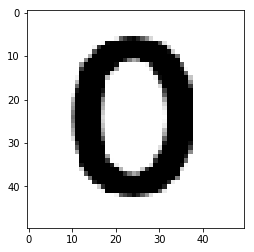

In [11]:
image_file_name = "/home/apofeo/Documents/symbols_new/0/0.png"
img = image.load_img(image_file_name, target_size=(50, 50))
plt.imshow(img)

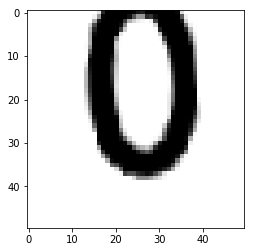

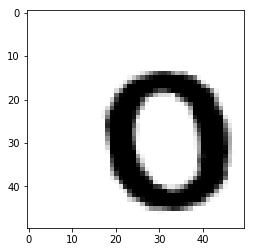

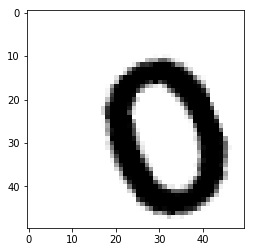

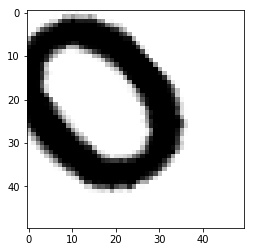

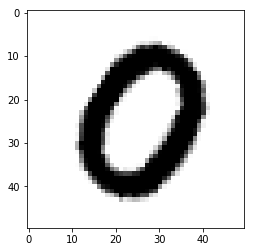

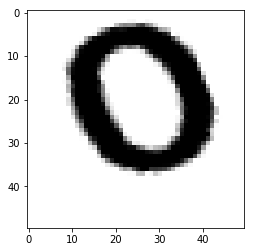

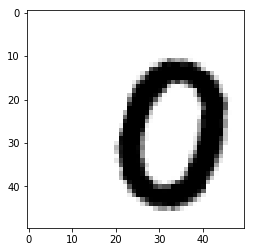

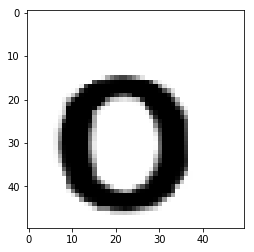

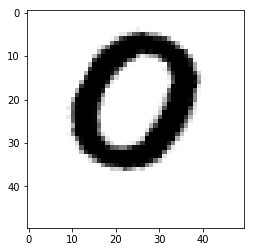

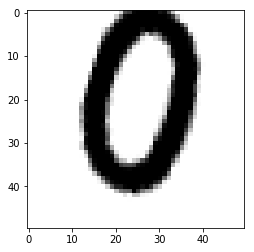

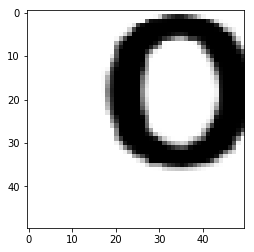

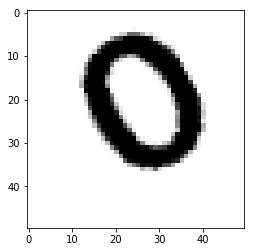

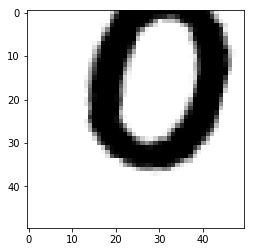

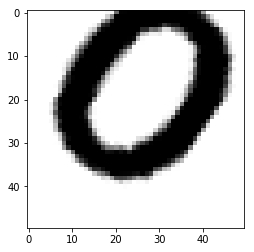

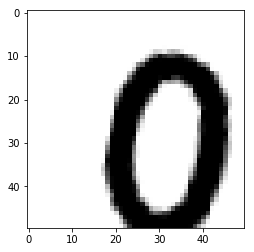

In [13]:

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 15 == 0:
        break
plt.show()